In [ ]:
import pandas as pd, numpy as np
from datetime import datetime
# import yfinance as yf
import tushare as ts
import time, urllib
ts.set_token('2f31c3932ead9fcc3830879132cc3ec8df3566550f711889d4a30f67')
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [2]:
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

In [6]:
ch_etfs = pd.read_csv("/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/"+"CH_ETFs.csv")
ch_etfs['code'] =ch_etfs['证券代码'].apply(lambda x: str(x)[:6])
ch_etfs_ticker = list(ch_etfs['code'].unique())
# Add the sp500 etf
etf_tickers = ['513500']+ch_etfs_ticker

In [7]:
len(etf_tickers)

262

In [101]:
def GetHistoryData(Code, BeginTime, EndTime):
    df = ts.get_k_data(Code, index = False,  start = BeginTime, end = EndTime)
    return df

today = str(datetime.now().date())
start = '2010-01-01'
end = today

ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
ticker_df_list = []
for ticker in etf_tickers:
    print("Reading ETF: ", ticker)
    try:
        ticker_df = pd.read_csv(ch_db_path+ticker+".csv")
        ticker_df_list.append(ticker_df)
#     except FileNotFoundError:
#         print("Does not have ETF {}, start downloading now...".format(ticker))
#         data = GetHistoryData(ticker, start, today)
#         data.to_csv(ch_db_path+ticker+".csv", index = False)
#         print("ETF {} downloaded.".format(ticker))
    except:
        pass

Reading ETF:  513500
Reading ETF:  518880
Reading ETF:  518800
Reading ETF:  515990
Reading ETF:  515983
Reading ETF:  515900
Reading ETF:  515880
Reading ETF:  515870
Reading ETF:  515860
Reading ETF:  515853
Reading ETF:  515810
Reading ETF:  515800
Reading ETF:  515750
Reading ETF:  515703
Reading ETF:  515680
Reading ETF:  515660
Reading ETF:  515650
Reading ETF:  515600
Reading ETF:  515590
Reading ETF:  515580
Reading ETF:  515550
Reading ETF:  515520
Reading ETF:  515390
Reading ETF:  515383
Reading ETF:  515360
Reading ETF:  515353
Reading ETF:  515330
Reading ETF:  515310
Reading ETF:  515300
Reading ETF:  515200
Reading ETF:  515180
Reading ETF:  515163
Reading ETF:  515150
Reading ETF:  515110
Reading ETF:  515093
Reading ETF:  515080
Reading ETF:  515070
Reading ETF:  515060
Reading ETF:  515050
Reading ETF:  515020
Reading ETF:  515010
Reading ETF:  515000
Reading ETF:  513900
Reading ETF:  513880
Reading ETF:  513800
Reading ETF:  513680
Reading ETF:  513660
Reading ETF: 

In [104]:
tickers = pd.concat(ticker_df_list)

# def vol_ewm(vol_series, window_span):
#     vol_mean = vol_series.ewm(span = window_span).mean()
#     return vol_mean

tickers['pct_chg'] = tickers.groupby(['code'])['close'].pct_change()

In [4]:
# 一次性merge多个pct_chg
from functools import reduce

# 先为之后使用reduce铺路：创造一个merge的函数：
def merge_df(df1, df2):
    df1.sort_values('date', inplace = True)
    merged = df1.merge(df2, on = 'date', how = 'outer')
    merged.sort_values('date', inplace = True)
    return merged

In [9]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
ticker_df_list = []
for ticker in etf_tickers:
    print("Reading ETF: ", ticker)
    try:
        ticker_df = pd.read_csv(ch_db_path+ticker+".csv")
        
        ticker_df = ticker_df.sort_values('date')
        ticker_df = ticker_df[['date','close','code']]
        ticker_df['pct_chg'] = ticker_df['close'].pct_change()
        ticker_df = ticker_df[['date', 'pct_chg']].dropna()
        ticker_df.columns = ['date',ticker]
        ticker_df['date'] = pd.to_datetime(ticker_df['date'])
    #     stock.set_index('date', inplace=True)
        ticker_df_list.append(ticker_df)
#     except FileNotFoundError:
#         print("Does not have ETF {}, start downloading now...".format(ticker))
#         data = GetHistoryData(ticker, start, today)
#         data.to_csv(ch_db_path+ticker+".csv", index = False)
#         print("ETF {} downloaded.".format(ticker))
    except:
        pass

Reading ETF:  513500


/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning:

Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).



Reading ETF:  518880
Reading ETF:  518800
Reading ETF:  515990
Reading ETF:  515983
Reading ETF:  515900
Reading ETF:  515880
Reading ETF:  515870
Reading ETF:  515860
Reading ETF:  515853
Reading ETF:  515810
Reading ETF:  515800
Reading ETF:  515750
Reading ETF:  515703
Reading ETF:  515680
Reading ETF:  515660
Reading ETF:  515650
Reading ETF:  515600
Reading ETF:  515590
Reading ETF:  515580
Reading ETF:  515550
Reading ETF:  515520
Reading ETF:  515390
Reading ETF:  515383
Reading ETF:  515360
Reading ETF:  515353
Reading ETF:  515330
Reading ETF:  515310
Reading ETF:  515300
Reading ETF:  515200
Reading ETF:  515180
Reading ETF:  515163
Reading ETF:  515150
Reading ETF:  515110
Reading ETF:  515093
Reading ETF:  515080
Reading ETF:  515070
Reading ETF:  515060
Reading ETF:  515050
Reading ETF:  515020
Reading ETF:  515010
Reading ETF:  515000
Reading ETF:  513900
Reading ETF:  513880
Reading ETF:  513800
Reading ETF:  513680
Reading ETF:  513660
Reading ETF:  513600
Reading ETF: 

In [11]:
ticker_df_list[:10]

[        date    515900
 1 2019-12-19 -0.009326
 2 2019-12-20 -0.020921,          date    515880
 1  2019-09-09  0.066477
 2  2019-09-10 -0.031167
 3  2019-09-11 -0.014706
 4  2019-09-12  0.009328
 5  2019-09-16  0.002773
 ..        ...       ...
 65 2019-12-16  0.016981
 66 2019-12-17  0.013915
 67 2019-12-18 -0.000915
 68 2019-12-19 -0.002747
 69 2019-12-20 -0.019284
 
 [69 rows x 2 columns],          date    515860
 1  2019-10-23 -0.004975
 2  2019-10-24 -0.006000
 3  2019-10-25  0.008048
 4  2019-10-28  0.029940
 5  2019-10-29 -0.011628
 6  2019-10-30 -0.008824
 7  2019-10-31 -0.009891
 8  2019-11-01  0.008991
 9  2019-11-04  0.007921
 10 2019-11-05  0.006876
 11 2019-11-06 -0.008780
 12 2019-11-07  0.009843
 13 2019-11-08  0.003899
 14 2019-11-11 -0.020388
 15 2019-11-12  0.000991
 16 2019-11-13  0.008911
 17 2019-11-14  0.002944
 18 2019-11-15 -0.000978
 19 2019-11-18  0.003918
 20 2019-11-19  0.033171
 21 2019-11-20 -0.006610
 22 2019-11-21 -0.001901
 23 2019-11-22 -0.024762
 24

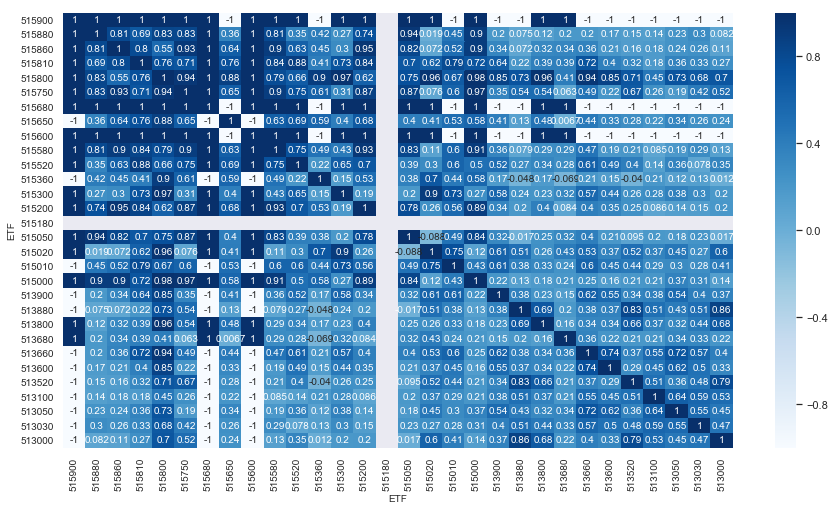

In [18]:
# 重要知识点：reduce
# stock_list里都是一个个dataframe
merged_all = reduce(merge_df, ticker_df_list[:30])
merged_all.set_index('date', inplace=True)
merged_all.dropna(how="all", axis = 1, inplace = True)

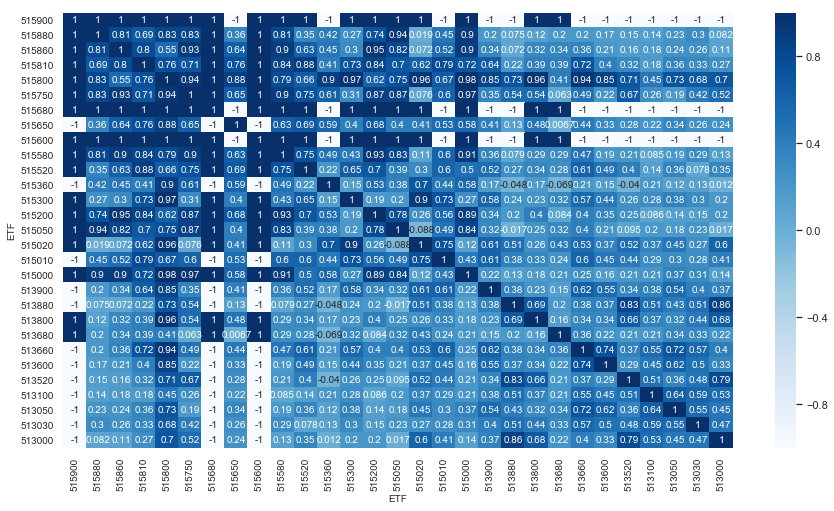

In [34]:
# 最后一步：plot heatmap:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(merged_all.corr()[abs(merged_all.corr())>-2], ax = ax, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot=True)
plt.xlabel('ETF', fontsize = 10)
plt.ylabel('ETF', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [73]:
merged_all.corr()

,515900,515880,515860,515810,515800,515750,515680,515650,515600,515580,...,513880,513800,513680,513660,513600,513520,513100,513050,513030,513000
515900,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,1.0,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
515880,1.0,1.000000,0.806226,0.685405,0.833862,0.826801,1.0,0.360275,1.0,0.809738,...,0.074595,0.122757,0.200348,0.199655,0.169404,0.150197,0.138605,0.229962,0.296836,0.082170
515860,1.0,0.806226,1.000000,0.795108,0.553887,0.927898,1.0,0.643898,1.0,0.899557,...,0.071529,0.321159,0.336286,0.361011,0.208405,0.162659,0.176205,0.235758,0.258461,0.108682
515810,1.0,0.685405,0.795108,1.000000,0.757243,0.714893,1.0,0.756617,1.0,0.838080,...,0.216361,0.394647,0.394456,0.720450,0.395735,0.320428,0.175076,0.361200,0.334005,0.270258
515800,1.0,0.833862,0.553887,0.757243,1.000000,0.938344,1.0,0.881547,1.0,0.787345,...,0.731023,0.961826,0.411056,0.944028,0.852949,0.706976,0.449245,0.725956,0.684777,0.704023
515750,1.0,0.826801,0.927898,0.714893,0.938344,1.000000,1.0,0.654081,1.0,0.895874,...,0.536070,0.539053,0.062975,0.487488,0.222330,0.673297,0.263122,0.185753,0.424406,0.524750
515680,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,1.0,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
515650,-1.0,0.360275,0.643898,0.756617,0.881547,0.654081,-1.0,1.000000,-1.0,0.634497,...,0.129699,0.478532,0.006682,0.437763,0.325421,0.278984,0.219619,0.335961,0.259273,0.244113
515600,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,1.0,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
515580,1.0,0.809738,0.899557,0.838080,0.787345,0.895874,1.0,0.634497,1.0,1.000000,...,0.079498,0.288364,0.291044,0.472442,0.192044,0.212309,0.085055,0.187923,0.291521,0.126394


In [39]:
abs_corr_thresh = 0.1
filtered_corr_df = merged_all.corr()[abs(merged_all.corr())<abs_corr_thresh]

In [43]:
filtered_corr_df.index

Index(['515900', '515880', '515860', '515810', '515800', '515750', '515680',
       '515650', '515600', '515580', '515520', '515360', '515300', '515200',
       '515050', '515020', '515010', '515000', '513900', '513880', '513800',
       '513680', '513660', '513600', '513520', '513100', '513050', '513030',
       '513000'],
      dtype='object')

In [44]:
filtered_etf_list = list(filtered_corr_df.index)

In [49]:
filtered_corr_df_res = filtered_corr_df.reset_index()

In [53]:
str(filtered_corr_df_res['515900'].values[0])

'nan'

In [56]:
filtered_corr_df

,515900,515880,515860,515810,515800,515750,515680,515650,515600,515580,...,513880,513800,513680,513660,513600,513520,513100,513050,513030,513000
515900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.074595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.082170
515860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.062975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.006682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.079498,NaN,NaN,NaN,NaN,NaN,0.085055,NaN,NaN,NaN


In [57]:
ready_to_trade_etf_list = []
for etf_col in filtered_etf_list:
    for i, corr_val in enumerate(filtered_corr_df_res[etf_col]):
        if str(corr_val)!='nan':
            etf_row = filtered_corr_df_res['index'][i]
            ready_to_trade_etf_list.append(etf_row)
            ready_to_trade_etf_list.append(etf_col)

In [61]:
ready_to_trade_etf_list = list(set(ready_to_trade_etf_list))

In [62]:
ready_to_trade_etf_list

['515880',
 '513100',
 '515200',
 '515520',
 '515650',
 '513680',
 '515750',
 '515860',
 '515020',
 '515580',
 '513000',
 '513520',
 '515050',
 '515360',
 '513030',
 '513880']

In [67]:
ticker_df_list_trade = []
for ticker in ready_to_trade_etf_list:
    print("Reading ETF: ", ticker)
    try:
        ticker_df = pd.read_csv(ch_db_path+ticker+".csv")
        
        ticker_df = ticker_df.sort_values('date')
        ticker_df = ticker_df[['date','close','code']]
        ticker_df['pct_chg'] = ticker_df['close'].pct_change()
        ticker_df = ticker_df[['date', 'pct_chg']].dropna()
        ticker_df.columns = ['date',ticker]
        ticker_df['date'] = pd.to_datetime(ticker_df['date'])
    #     stock.set_index('date', inplace=True)
        ticker_df_list_trade.append(ticker_df)
#     except FileNotFoundError:
#         print("Does not have ETF {}, start downloading now...".format(ticker))
#         data = GetHistoryData(ticker, start, today)
#         data.to_csv(ch_db_path+ticker+".csv", index = False)
#         print("ETF {} downloaded.".format(ticker))
    except:
        pass

Reading ETF:  515880
Reading ETF:  513100
Reading ETF:  515200
Reading ETF:  515520
Reading ETF:  515650
Reading ETF:  513680
Reading ETF:  515750
Reading ETF:  515860
Reading ETF:  515020
Reading ETF:  515580
Reading ETF:  513000
Reading ETF:  513520
Reading ETF:  515050
Reading ETF:  515360
Reading ETF:  513030
Reading ETF:  513880


In [ ]:
ticker_df_list_trade

[         date    515880
 1  2019-09-09  0.066477
 2  2019-09-10 -0.031167
 3  2019-09-11 -0.014706
 4  2019-09-12  0.009328
 5  2019-09-16  0.002773
 ..        ...       ...
 65 2019-12-16  0.016981
 66 2019-12-17  0.013915
 67 2019-12-18 -0.000915
 68 2019-12-19 -0.002747
 69 2019-12-20 -0.019284
 
 [69 rows x 2 columns],            date    513100
 1    2013-05-16  0.002006
 2    2013-05-17 -0.002002
 3    2013-05-20  0.000000
 4    2013-05-21  0.000000
 5    2013-05-22  0.002006
 ...         ...       ...
 1607 2019-12-16  0.006433
 1608 2019-12-17  0.010227
 1609 2019-12-18 -0.009174
 1610 2019-12-19 -0.003512
 1611 2019-12-20  0.010894
 
 [1611 rows x 2 columns],          date    515200
 1  2019-11-18  0.002000
 2  2019-11-19  0.025948
 3  2019-11-20 -0.005837
 4  2019-11-21 -0.005871
 5  2019-11-22 -0.015748
 6  2019-11-25 -0.009000
 7  2019-11-26  0.003027
 8  2019-11-27  0.000000
 9  2019-11-28 -0.004024
 10 2019-11-29 -0.008081
 11 2019-12-02 -0.002037
 12 2019-12-03  0.001020

In [69]:
merged_all_ = reduce(merge_df, ticker_df_list_trade)
merged_all_.set_index('date', inplace=True)
merged_all_.dropna(how="all", axis = 1, inplace = True)

In [70]:
merged_all_

,515880,513100,515200,515520,515650,513680,515750,515860,515020,515580,513000,513520,515050,515360,513030,513880
date,,,,,,,,,,,,,,,,
2013-05-16,NaN,0.002006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-17,NaN,-0.002002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-20,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-21,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-22,NaN,0.002006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-16,0.016981,0.006433,0.013699,0.008000,-0.001011,-0.001025,0.016268,0.022727,-0.002967,0.023810,-0.001770,0.000887,0.021934,0.003332,0.000000,-0.001803
2019-12-17,0.013915,0.010227,0.003861,0.003968,0.011134,0.009231,0.008475,0.002778,0.011905,0.007442,0.002660,0.002660,0.009756,0.014819,0.005333,0.002710
2019-12-18,-0.000915,-0.009174,0.001923,0.000988,-0.002002,-0.003049,-0.002801,0.001847,0.001961,0.000923,-0.006189,-0.007073,-0.001932,-0.002769,-0.008842,-0.006306


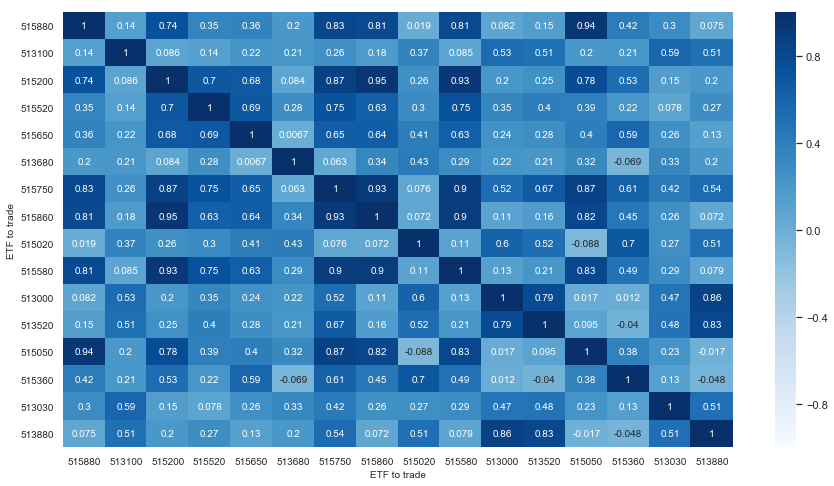

In [71]:
# 最后一步：plot heatmap:
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(merged_all_.corr()[abs(merged_all_.corr())>-2], ax = ax, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot=True)
plt.xlabel('ETF to trade', fontsize = 10)
plt.ylabel('ETF to trade', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

## Individual ETF plotting

In [106]:
dt = tickers[tickers['code']==515880]

In [108]:
y_close = dt['open']
x_dt = dt['date']
etf_513500 = go.Scatter(
        x = x_dt,
        y = y_close,
#         mode = 'lines',
#         name = 'lines'
)

In [110]:
data_etf_513500 = [etf_513500]
py.iplot(data_etf_513500)

# Plotly application example

https://www.jianshu.com/p/f8423ad5e06e

In [52]:
N = 100
random_x = np.linspace(0,1,N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

#Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)
data = [trace0,trace1,trace2]
# py.plot(data)

In [56]:
etf_513500

Scatter({
    'mode': 'lines',
    'name': 'lines',
    'x': array(['2014-01-15', '2014-01-16', '2014-01-17', ..., '2019-12-18',
                '2019-12-19', '2019-12-20'], dtype=object),
    'y': array([0.986, 0.991, 0.987, ..., 2.091, 2.084, 2.097])
})

In [54]:
trace0

Scatter({
    'mode': 'markers',
    'name': 'markers',
    'x': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404, 0.05050505,
                0.06060606, 0.07070707, 0.08080808, 0.09090909, 0.1010101 , 0.11111111,
                0.12121212, 0.13131313, 0.14141414, 0.15151515, 0.16161616, 0.17171717,
                0.18181818, 0.19191919, 0.2020202 , 0.21212121, 0.22222222, 0.23232323,
                0.24242424, 0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434, 0.35353535,
                0.36363636, 0.37373737, 0.38383838, 0.39393939, 0.4040404 , 0.41414141,
                0.42424242, 0.43434343, 0.44444444, 0.45454545, 0.46464646, 0.47474747,
                0.48484848, 0.49494949, 0.50505051, 0.51515152, 0.52525253, 0.53535354,
                0.54545455, 0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
                0.60606061, 0.61616162, 0.62626263, 0.63636364, 

In [39]:
data

[Scatter({
     'mode': 'markers',
     'name': 'markers',
     'x': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404, 0.05050505,
                 0.06060606, 0.07070707, 0.08080808, 0.09090909, 0.1010101 , 0.11111111,
                 0.12121212, 0.13131313, 0.14141414, 0.15151515, 0.16161616, 0.17171717,
                 0.18181818, 0.19191919, 0.2020202 , 0.21212121, 0.22222222, 0.23232323,
                 0.24242424, 0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                 0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434, 0.35353535,
                 0.36363636, 0.37373737, 0.38383838, 0.39393939, 0.4040404 , 0.41414141,
                 0.42424242, 0.43434343, 0.44444444, 0.45454545, 0.46464646, 0.47474747,
                 0.48484848, 0.49494949, 0.50505051, 0.51515152, 0.52525253, 0.53535354,
                 0.54545455, 0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
                 0.60606061, 0.61616162, 0.62626263